In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import loadmat
import seaborn as sn
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [2]:
X= loadmat(r'C:\Users\Tutku\PycharmProjects\pythonProject24\Salinas.mat')['salinas']
Y= loadmat(r'C:\Users\Tutku\PycharmProjects\pythonProject24\Salinas_gt.mat')['salinas_gt']


x_ = X.reshape((512*217, 224))
y_ = Y.reshape((512*217, 1))
print(x_.shape, y_.shape)

(111104, 224) (111104, 1)


In [3]:
x_.shape
y_.shape

print (x_.shape, y_.shape)

(111104, 224) (111104, 1)


In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

x = sc_X.fit_transform(x_)
X_Train,  X_Test, Y_Train, Y_Test = train_test_split(x, y_, test_size = 0.25, random_state = 0)

In [5]:
print(Y_Train.shape)

(83328, 1)


In [6]:
classifier =  SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_Train, Y_Train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=100, cache_size=10240)

In [7]:
Y_Pred = classifier.predict(X_Test)
print(Y_Pred)

[ 8  7  8 ...  0 15  8]


In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)

In [9]:
print(cm)
cm.shape

[[13329    86    63    94    35   113    92    67    64    66    35    25
     65    33    46    53    37]
 [    2   510     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   21     0   909     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   60     0     0   465     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   51     0     0     0   307     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   27     0     0     0     1   638     0     0     0     0     0     0
      0     0     0     0     0]
 [   17     0     0     0     0     0   949     0     0     0     0     0
      0     0     0     0     0]
 [   13     0     0     0     0     0     0   901     0     0     0     0
      0     0     0     0     0]
 [   39     0     0     0     0     0     0     0  2520     0     0     0
      0     0     0   216     0]
 [   49     0     0     0     0     0

(17, 17)

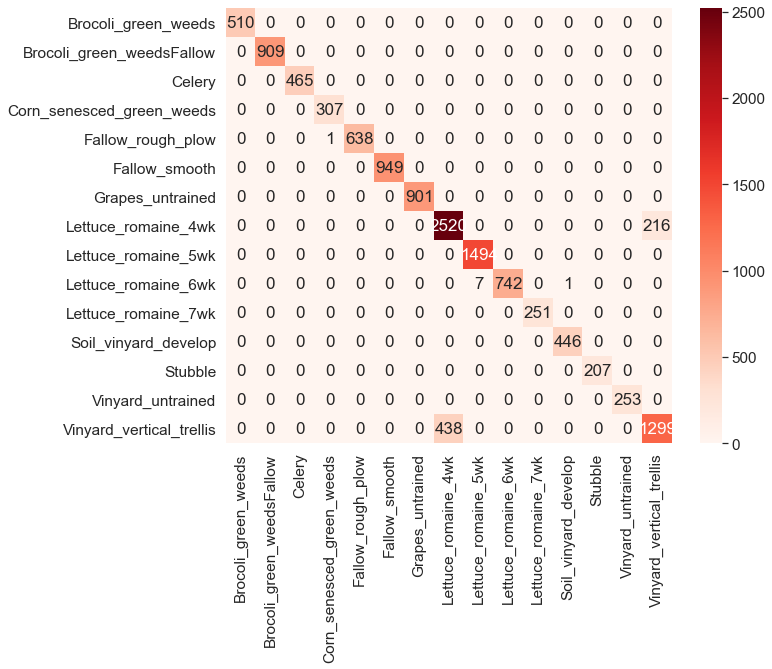

In [12]:
names = ['Brocoli_green_weeds', 'Brocoli_green_weeds' 'Fallow', 'Fallow_rough_plow','Fallow_smooth','Stubble','Celery'
,'Grapes_untrained' ,'Soil_vinyard_develop' ,'Corn_senesced_green_weeds','Lettuce_romaine_4wk','Lettuce_romaine_5wk','Lettuce_romaine_6wk'
,'Lettuce_romaine_7wk','Vinyard_untrained','Vinyard_vertical_trellis']

df_cm = pd.DataFrame(cm[1:16, 1:16] , columns=np.unique(names), index = np.unique(names))

#df_cm.index.name = 'Actual'

#df_cm.columns.name = 'Predicted'

plt.figure(figsize = (10,8))

sn.set(font_scale=1.4) #for label size

sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 17}, fmt='d')

plt.savefig('cmap.png', dpi=300)